In [114]:
import numpy as np 
import pandas as pd 
import os
import cv2
import tensorflow as tf

## Labels

In [115]:
labels = os.listdir(r"Data/train")

## Visualize A random image

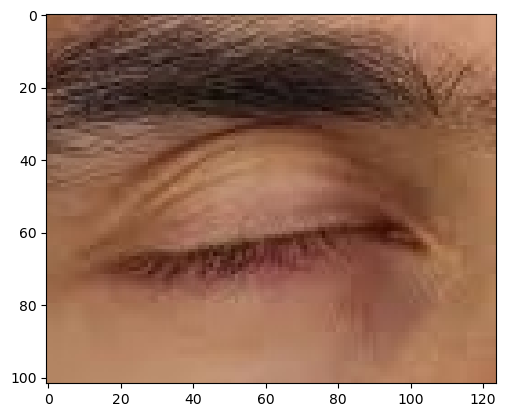

In [117]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread('Data/train/Closed/_5.jpg'))

In [118]:
# Data parameters
data_dir = '/home/ahaanbanerjee/Embedded/Embedded/Drowsy_Driver/models/Data/train'


In [119]:
# Create training dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,  # 20% of data used for validation
    subset="training",
    seed=123,  # Seed for reproducibility
    image_size=(145, 145),  # Resizing
    batch_size=32
)

# Create validation dataset
val_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,  # Same split as training
    subset="validation",
    seed=123,
    image_size=(145, 145),  # Resizing
    batch_size=32
)


Found 1452 files belonging to 2 classes.
Using 1162 files for training.
Found 1452 files belonging to 2 classes.
Using 290 files for validation.


## Import some dependencies

In [120]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# Model

In [121]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(145,145,3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 143, 143, 256)     7168      
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 71, 71, 256)       0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 69, 69, 128)       295040    
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 34, 34, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 16, 16, 64)       

In [122]:
history = model.fit(train_dataset, epochs=50, validation_data=val_dataset, shuffle=True)

Epoch 1/50
37/37 [==============================] - 3s 66ms/step - loss: 2.4679 - accuracy: 0.6575 - val_loss: 0.3601 - val_accuracy: 0.9207
Epoch 2/50
37/37 [==============================] - 2s 63ms/step - loss: 0.4043 - accuracy: 0.8382 - val_loss: 0.3531 - val_accuracy: 0.8931
Epoch 3/50
37/37 [==============================] - 2s 64ms/step - loss: 0.3386 - accuracy: 0.8830 - val_loss: 0.2189 - val_accuracy: 0.9345
Epoch 4/50
37/37 [==============================] - 2s 63ms/step - loss: 0.2697 - accuracy: 0.9088 - val_loss: 0.2436 - val_accuracy: 0.9379
Epoch 5/50
37/37 [==============================] - 2s 63ms/step - loss: 0.3420 - accuracy: 0.8898 - val_loss: 0.2797 - val_accuracy: 0.9448
Epoch 6/50
37/37 [==============================] - 2s 64ms/step - loss: 0.2537 - accuracy: 0.9062 - val_loss: 0.3018 - val_accuracy: 0.9379
Epoch 7/50
37/37 [==============================] - 2s 63ms/step - loss: 0.2753 - accuracy: 0.9174 - val_loss: 0.2154 - val_accuracy: 0.9276
Epoch 8/50
37

## History

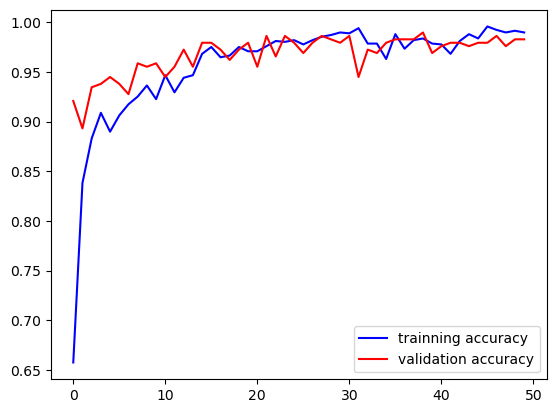

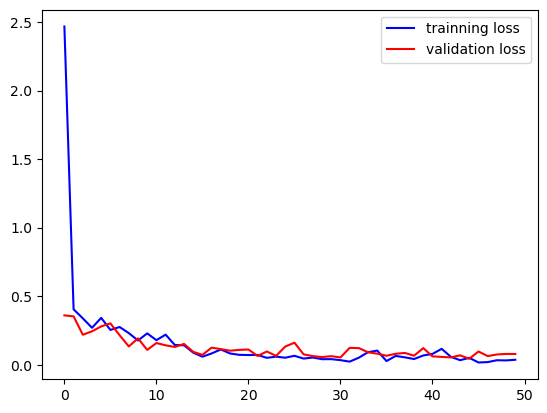

In [145]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

## Save Model

In [146]:
#model.save("DDD_model_new.h5")

In [204]:
import tensorflow as tf

# Load your Keras model from the .h5 file
model = tf.keras.models.load_model('cnnCat2.h5')

## Converting .h5 weight file to tflite format for RaspberryPi deployment

In [205]:
# Initialize the TFLite converter with your Keras model
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Convert the model to TensorFlow Lite format
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('model2.tflite', 'wb') as f:
    f.write(tflite_model)



INFO:tensorflow:Assets written to: /tmp/tmplgdkuxbx/assets


INFO:tensorflow:Assets written to: /tmp/tmplgdkuxbx/assets
2024-04-26 16:32:44.475358: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-04-26 16:32:44.475381: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-04-26 16:32:44.475642: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmplgdkuxbx
2024-04-26 16:32:44.476679: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-04-26 16:32:44.476688: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /tmp/tmplgdkuxbx
2024-04-26 16:32:44.479026: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2024-04-26 16:32:44.479831: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2024-04-26 16:32:44.529100: I tensorflow/cc/saved_model/loader.cc:217] Running initializatio